<a href="https://colab.research.google.com/github/DakaiZhou/machine-learning-algorithm-implementation/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Linear Regression is one of the very basic supervised learning. It is usually used to predict continuous values. A simple example will be used to explain it.

A linear function will be used in linear regression. Usually it looks like this

\begin{gather}
h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + .... + \theta_n x_n
\end{gather}

where $x$ are features, specificly $x_0 = 1$, $\theta$s are weights.

With matrix operation, it can be further simplified as:

\begin{gather}
h_{\theta}(x) = 
\begin{bmatrix}
1 & x_1 & ... & x_n
\end{bmatrix}
\begin{bmatrix}
\theta_0\\
\theta_1\\
... \\
\theta_n
\end{bmatrix}
\end{gather}

We then define a **cost function** to measure how close the $h_{\theta}(x)$'s to the corresponding $y^{(i)}$: 

\begin{gather}
J(\theta) = \frac{1}{2}\sum\limits_{i=1}^m{(h_\theta(x^{(i)})} - y^{(i)})^2
\end{gather}

where $m$ is the size of the training data, $(y^{(i)}, x^{(i)})$ denotes the $i_{th}$ training example. 

## LMS algorithm
The goal is to minimize $J(\theta)$. TO do so, let's first use a search algorithm which starts with initial guess for $\theta$, and keep changing $\theta$ to make $J(\theta)$ smaller, until we converge to a value of $\theta$ that minimize $J(\theta)$. One very popular algorithm is **gradient descent**, which starts with some initial $\theta$, and repeatedly performs the updates:
\begin{gather}
\theta_j := \theta_j - \alpha\frac{\partial{J(\theta)}}{\partial\theta_j}
\end{gather}

$\alpha$ is the **training rate**, which will desice the step size in the direction of steepest decrease of $J$. $j = 0, 1 ..., n$

Inserting $J(\theta)$ into the derivative, we have:

\begin{align}
\frac{\partial{J(\theta)}}{\partial\theta_j} &= \frac{\partial}{\partial{\theta_j}}\frac{1}{2}(h_{\theta}(x) - y)^2 \\
& = 2*\frac{1}{2}(h_{\theta}(x) - y)\frac{\partial}{\partial\theta_j}(h_{\theta}(x)-y)\\
& = (h_{\theta}(x)-y)\frac{\partial}{\partial\theta_j}(\sum\limits_{ i=0}^n (\theta_ix_i - y))\\
& = (h_\theta(x) - y)x_j
\end{align}

For a single training example, the update will be:

\begin{gather}
\theta_j := \theta_j + \alpha(y^{(i)}-h_\theta(x^{(i)}))x_j^{(i)}
\end{gather}

This is **LMS** (least mean squares). There are two ways to modify this method for a training set of more than one example. The first is as following:

>>*Repeat until convergence {*
>>>$\theta_j :=  \theta_j + \alpha\sum\limits_{i=0}^m (y^{(i)} - h_{\theta}(x^{(i)}))x_j^{(i)}$ &nbsp;&nbsp; (for every $j$)

>>*}*

This method looks at every training example in the taining data set on every step, and is called **batch gradient descent**. 

Now, let's implement batch gradient descent.

Given a data set, we first load the data to check the information.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
df_tr = pd.read_csv("data/salary_data.csv")

In [ ]:
df_tr.info()
df_tr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


Good, the training data set has no missing values. Next, we plot the data and check the distribution. 

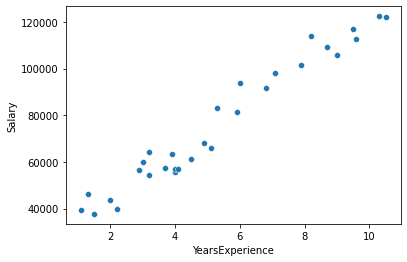

In [ ]:
sns.scatterplot(data=df_tr, x="YearsExperience", y="Salary")

From the plot, we see that YearsExperience and Salary have positive linear relation. For this section linear reression, we construct a linear function as follows:

\begin{gather}
h_{\theta}(x) = \theta_0 + \theta_1 x_1
\end{gather}

where $x_0 = 1$, $x_1$ is YearsExperience, $\theta$ are weights. With matrix form: 

\begin{gather}
h_{\theta}(x) = 
\begin{bmatrix}
1 & x_1
\end{bmatrix}
\begin{bmatrix}
\theta_0\\
\theta_1
\end{bmatrix}
\end{gather}

The following code is the implementation.

In [ ]:
def batch_gradient_descent(x, y, *args, **kwargs):
    """
    Algorithm for simple linear regression.
    Input: x training data, column vector or matrix, each column for one feature
           y training data, ground truth, column vector
           alpha learning rate optional
           tol tolorance optional
    Output: theta estimated parameters
            h estimations
    """

    alpha = 10**-3
    tol = 10**-5

    if len(kwargs) > 2:
      raise Exception("Too many inputs.")
    elif len(kwargs) > 0:
      if "alpha" in kwargs.keys():
        alpha = kwargs["alpha"]
      if "tol" in kwargs.keys():
        tol = kwargs["tol"]
      


    num_feature = np.shape(x)[1]
    num_example = np.shape(x)[0]
    theta = np.ones((num_feature + 1, 1)) * 0.2
    new_col = np.ones(num_example)
    x = np.insert(x, 0, new_col, axis=1)
    # self.tol = self.tol * num_example

    h = np.dot(x, theta)  # our hypothesis
    num_loop = 0
    pj = 0

    while num_loop <= 10000:
        tmp = alpha * sum((y - h) * x)
        theta = theta + tmp.reshape((num_feature + 1, 1))
        h = np.dot(x, theta)
        j = 0.5 * sum((h - y) ** 2)
        if abs(j - pj) <= tol:
            return theta, h
        pj = j
        num_loop = num_loop + 1
    print("gradient descent does not convergence after maximum interation.")
    return theta, h



In [ ]:
x = df_tr["YearsExperience"].values
y = df_tr['Salary'].values
n = np.size(y)
x = x.reshape((n, 1))
y = y.reshape((n, 1))
theta1, h1 = batch_gradient_descent(x, y) 

Plot of our estimation over the training data, we get a stright line which go through the data. The esimation is reasonable.

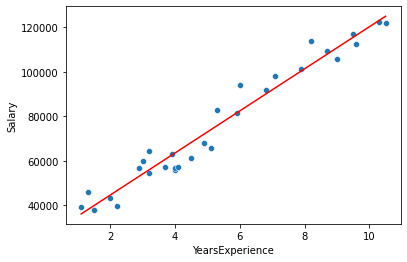

In [ ]:
sns.scatterplot(data=df_tr, x="YearsExperience", y="Salary")
sns.lineplot(data=df_tr, x="YearsExperience", y=h1.reshape(np.size(h1)), color="red")

An alternative to batch gradient descent is **stochastic gradient descent**. Instead of looking at every example in each update step, this method update the parameters with every single training example. It starts the estimation right away:
>> *Loop {*
>>>for i = 1 to m, {
>>>>$\theta_j := \theta_j + \alpha(y^{(i)} - h_\theta(x^{(i)}))x_j^{(i)}$ 

>>>}

>>*}*

Therefore, stochastic gradient descent is much faster tha batch gradient descent, especially when the size of traing set is large. (Note however $\theta$ may never converge to the minimum, and it will keep oscillating around the minimum of $J(\theta)$. In practice, the values near the minimum will be reasonally good approximations to the true minimum.) In practice, when the training data size is large, stochastic gradient descent is often preferred than batch gradient descent.

The implementation is as follows:

In [ ]:
def stochastic_gradient_descent(x, y, *args, **kwargs):
    """
    Algorithm for simple linear regression.
    Input: x training data, column vector or matrix, each column for one feature
           y training data, ground truth, column vector
           alpha learning rate optional
           tol tolorance optional
    Output: theta estimated parameters
            h estimations
    """

    alpha = 10**-3
    tol = 10**-5

    if len(kwargs) > 2:
      raise Exception("Too many inputs.")
    elif len(kwargs) > 0:
      if "alpha" in kwargs.keys():
        alpha = kwargs["alpha"]
      if "tol" in kwargs.keys():
        tol = kwargs["tol"]
      


    num_feature = np.shape(x)[1]
    num_example = np.shape(x)[0]
    theta = np.ones((num_feature + 1, 1)) * 0.2
    new_col = np.ones(num_example)
    x = np.insert(x, 0, new_col, axis=1)
    # self.tol = self.tol * num_example

    h = np.dot(x, theta)  # our hypothesis
    num_loop = 0
    pj = 0

    while num_loop <= 10000:
      for i in range(num_example):
        h = np.dot(x[i, :], theta)
        j = 0.5 * ((h - y[i]) ** 2)
        if abs(j - pj) <= tol:
          return theta, h
        else:
          tmp = alpha * ((y[i] - h) * x[i, :])
          theta = theta + tmp.reshape((num_feature + 1, 1))
        pj = j
      num_loop = num_loop + 1
    print("gradient descent does not convergence after maximum interation.")
    return theta, h



In [ ]:
# x = df_tr["YearsExperience"].values
# y = df_tr['Salary'].values
# n = np.size(y)
# x = x.reshape((n, 1))
# y = y.reshape((n, 1))
theta2, h2 = batch_gradient_descent(x, y) 

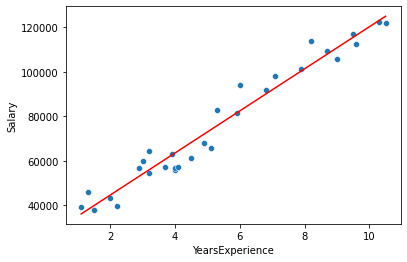

In [ ]:
sns.scatterplot(data=df_tr, x="YearsExperience", y="Salary")
sns.lineplot(data=df_tr, x="YearsExperience", y=h2.reshape(np.size(h2)), color="red")

Both methods give a good estimation(in this example, both give identical results).

## The normal equations
This method will minimize $J$ by explicitly taking its derivatives with respect to th $\theta$s, and setting them to zeros.

With matrix operations, we can have **normal equations**:

\begin{align}
\nabla_\theta J(\theta) &= \nabla_\theta\frac{1}{2}(X\theta-\vec y)^T(X\theta-\vec y)\\
&= X^TX\theta - X^T \vec y
\end{align}

Set it to zero, further have:
\begin{gather}
 X^TX\theta = X^T \vec y
 \end{gather}

 Thus, the value $\theta$ is given in closed form by the equation
 \begin{gather}
 \theta = (X^TX)^{-1}X^T\vec y
 \end{gather}

 (Details see [here](https://github.com/DakaiZhou/machine-learnng-notes-andrew-ng/blob/master/cs229-notes-all/cs229-notes1.pdf).)

In [ ]:
def normal_euqation(x, y):
  '''
  Input: x features in traning data
         y ground truth in training data

  Output: theta estimated parameter
          h final extimations
  '''
  num_example = np.shape(x)[0]
  new_col = np.ones(num_example)
  x = np.insert(x, 0, new_col, axis=1)
  theta = np.dot(np.dot(np.linalg.inv(np.dot(x.transpose(), x)), x.transpose()), y)
  h = np.dot(x, theta)
  return theta, h

In [ ]:
# x = df_tr["YearsExperience"].values
# y = df_tr['Salary'].values
# n = np.size(y)
# x = x.reshape((n, 1))
# y = y.reshape((n, 1))
theta3, h3 = normal_euqation(x, y) 

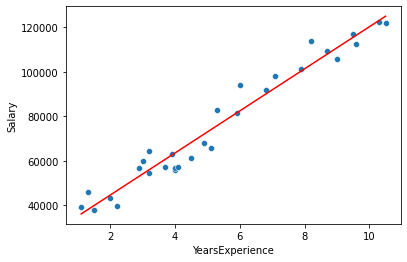

In [ ]:
sns.scatterplot(data=df_tr, x="YearsExperience", y="Salary")
sns.lineplot(data=df_tr, x="YearsExperience", y=h3.reshape(np.size(h3)), color="red")

In [ ]:
theta3 - theta1

array([[ 0.01550162],
       [-0.00230038]])

The estimated parameters by normal equations are very close to the other two methods.

## Locally weighted linear regression

The choice of features is important. Less features or too much features may cause underfitting and overfitting. **Locally weighted linear regression** is one of the algorithms that makes the choice of features less critical. 

The locally weighted linear regression algorithm does the following: 
 

1.   Fit $\theta$ to minimize $\sum_iw^{(i)}(y^{(i)}-\theta^Tx^{(i)})^2.$
2.   Output $\theta^Tx$.

When $w^{(i)}$ is large, $\theta$ will try hard to make $y^{(i)}-\theta^Tx^{(i)}$ small. When $w^{(i)}$ is small, $y^{(i)}-\theta^Tx^{(i)}$ will be pretty much ignored in the fitting process.

A fairly standard choice for the weights is:

\begin{gather}
w^{(i)} = \exp(-\frac{(x^{(i)} - x)^2}{2\tau^2})

\end{gather}

It is like a bell shape function, the $x^{(i)}$ close to $x$ will have larger weight. Hence, $\theta$ is choosing giving a much higher weight when the training examples close to query point x. The parameter $\tau$ controls how quickly the weight of a training example falls oﬀ with distance of its $x^{(i)}$ from the query point $x$, it is named **bandwidth**. 

Unlike unweighted linear regression, locally weighted linear regression needs to keep the training set to make prediction. It is called **non-parametric **.  The term “non-parametric” (roughly) refers to the fact that the amount of stuﬀ we need to keep in order to represent the hypothesis $h$ grows linearly with the size of the training set.

The normal equation for locally weighted linear regression is:
\begin{gather}
\nabla_\theta J(\theta) = \nabla_\theta\frac{1}{2} (W(X\theta-\vec y))^T(X\theta-\vec y) := 0\\
\theta = (X^TWX)^{-1}(X^TW\vec y)
\end{gather}
where $W$ is 
\begin{gather}
\begin{bmatrix}
w^0 & 0 & 0 & ... & 0\\
0 & w^1 & 0 & ... & 0\\
. & . & . & ... &   .\\
. & . & . & ... &   .\\
. & . & . & ... &   .\\
0 & 0 & 0 & ... & w^m
\end{bmatrix}
\end{gather}

The implementation is as follows:


In [ ]:
def locally_weighted_linear_regression(x, y, i, tau):
  '''
  Input: x features in traning data
         y ground truth in training data
         i index of the query point
         tau bandwidth

  Output: theta estimated parameter
          h final extimations
          w weights
  '''
  
  num_example = np.shape(x)[0]
  new_col = np.ones(num_example)
  x = np.insert(x, 0, new_col, axis=1)
  w = np.exp(-(x[i, 1] - x[:, 1])**2 / (2 * tau**2))
  W = np.diag(w)
  theta = np.dot(np.linalg.inv(np.dot(np.dot(x.transpose(), W), x)), np.dot(np.dot(x.transpose(), W), y))
  h = np.dot(x, theta)
  return theta, h, w

  

In [ ]:
theta4, h4, w = locally_weighted_linear_regression(x, y, 9, 0.3)

In [ ]:
w

array([4.89586526e-017, 1.26641655e-014, 2.10040929e-012, 1.06453714e-007,
       3.72665317e-006, 2.85655008e-002, 6.57285286e-002, 2.49352209e-001,
       2.49352209e-001, 1.00000000e+000, 8.00737403e-001, 6.06530660e-001,
       6.06530660e-001, 4.11112291e-001, 2.85655008e-002, 3.35462628e-004,
       1.86644691e-005, 6.65836147e-007, 2.10040929e-012, 1.72412094e-013,
       6.50878852e-024, 1.28423137e-028, 2.74878501e-043, 1.38634329e-049,
       4.80089224e-061, 1.68241585e-068, 6.84205918e-082, 1.02866199e-084,
       7.95674389e-106, 2.72002624e-112])

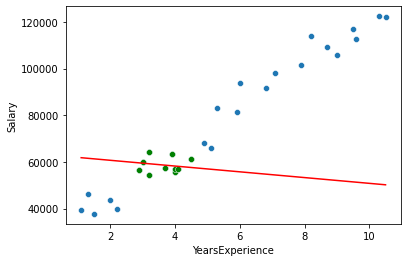

In [ ]:
sns.scatterplot(data=df_tr, x="YearsExperience", y="Salary")
sns.scatterplot(data=df_tr, x=df_tr.loc[w > 0.01]["YearsExperience"], y=df_tr.loc[w>0.01]["Salary"], color="green")
sns.lineplot(data=df_tr, x="YearsExperience", y=h4.reshape(np.size(h4)), color="red")

In the above locally weighted linear regression plot, the line fits with the green points. The middle green point has the largest weight, and the weights decrease proportional to the distance away from the middle point. Only a segment of this line(which fits the green points) will be counted in the final result. The final fit will be a combination of segments from multiple lines.